# Kinetic Ising Models

* Ising model has no Hamiltonian given dynamics. For kinetics we assume that an associated heat bath generates spin flip $(S_i \rightarrow -S_i)$
* The kinetics can be
    * The spin system, which have a non-conserved kinetics. At the microscopic level, spin-flip Glauber model is used to describe the non-conserved kinetics of the paramagnetic to ferromagnetic transition
    * The binary (AB) mixture or Lattice Gas. The spin-exchange Kawasaki model is used to describe the conserved kinetics of binary mixtures at the microscopic level
* Purely dissipative and stochastic models are ofter referred to as Kinetic Ising models.
* At the coarse-grained level the respective order parameters,  $\phi(\textbf{r}, t)$  are used to describe the dynamics.

## Domain Growth with non-conserved kinetics
* At  $t=0$,  a paramagnetic phase is quenched below the critical temperature  $T_c$.
* The paramagnetic state is no longer the preferred equilibrium state.
* The far-from-equilibrium, homogeneous, state evolves towards its new equilibrium state by separating in domains.
* These domains coarsen with time and are characterized by length scale  $L(t)$.
* A finite system becomes ordered in either of two equivalent states as  $t \rightarrow \infty$.
* The simplest kinetics Ising model for non-conserved scalar field $\phi(\textbf{r})$ is the time dependent Ginzburg-Landau (TDGL) model.

## TDGL equation
The equation of motion for $\phi$ can be written as:
\begin{equation}
\frac{\partial \phi}{\partial t} = -\Gamma \frac{\delta \mathcal{F}}{\delta \phi} +\theta(\vec{r},t)
\end{equation}

where $\dfrac{\delta F}{\delta \phi}$ denotes functional derivative of free-energy functional

\begin{equation}
\mathcal{F(\phi)} = \int \left[a\phi^2 + b \phi^4 + \frac{1}{2}K(\nabla\phi)^{2}\right]
\end{equation}

In the next section we will simulate the TDGL equation.

In [1]:
# Simulating the TDGL equation
# This example uses the 5-point Laplacian discretization from 
# [here](https://github.com/ketch/finite-difference-course)
#
%matplotlib inline
import numpy as np
from __future__ import division
from scipy.sparse import spdiags,linalg,eye
import matplotlib.pyplot as plt


a, b, k = 0, 1.0, 100.0
dh, dt  = 1.0, 1e-3
N, T    = 256, 10001

class TDGL():
    '''
    Class to solve a PDE 
    '''
    def mu(self, u):
        return a*u + b*u*u*u 

    def laplacian(self, N):
        '''Construct a sparse matrix that applies the 5-point Laplacian discretization'''
        e=np.ones(N**2)
        e2=([1]*(N-1)+[0])*N
        e3=([0]+[1]*(N-1))*N
        h=dh
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-N,N],N**2,N**2)
        A/=h**2
        return A

    def integrate(self, L, x, y, u):
        '''  simulates the equation and plots it at different instants '''
        
        f = plt.figure(figsize=(15, 15), dpi=80);    

        for i in range(T):          
            u = u - dt*(self.mu(u) - k*L.dot(u))
            
            if (i==0):      self.configPlot(x, y, u, f, 1, i);
            if (i==1):      self.configPlot(x, y, u, f, 2, i);
            if (i==10):     self.configPlot(x, y, u, f, 3, i);
            if (i==100):    self.configPlot(x, y, u, f, 4, i);
            if (i==1000):   self.configPlot(x, y, u, f, 5, i);
            if (i==10000):  self.configPlot(x, y, u, f, 6, i);
     
    def configPlot(self, x, y, u,f, n_, i):
        U= u.reshape((N,N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(x,y,U, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i)
    plt.show()

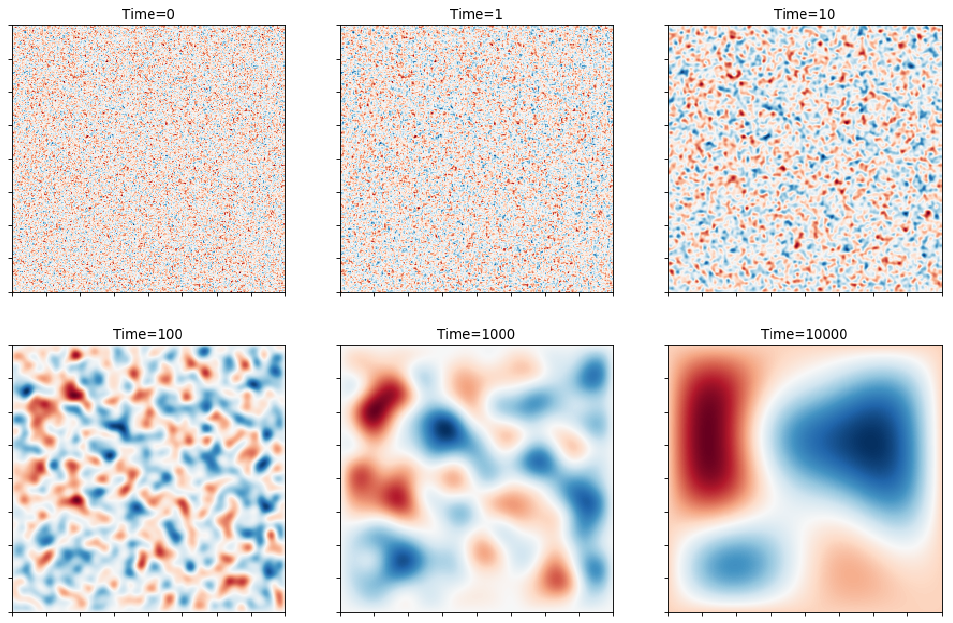

In [2]:
rm = TDGL()   # instantiate the class

# generate the grid and initialise the field
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X, Y = np.meshgrid(x, y)

u=np.random.randn(N*N, 1);  # Initial data
L = rm.laplacian(N)         # construct the laplacian
rm.integrate(L, x, y, u)    # simulate

#simulation completed!!

Thus we see that time evolution of the Monte carlo simulation of the Ising model and that of the TDGL equation are similar. The TDGL equation is a hydrodynamic model while the simulation of the Ising model was done at the molecular level. We still see a similarity in the time evolution, as expected!